# Temperature Field Plot

In [1]:
%matplotlib inline
%reset -f
import fnmatch
import scipy.optimize as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import glob
from IPython.display import set_matplotlib_formats
from scipy.optimize import curve_fit
import re
import datetime as dt 
import scipy.signal
import matplotlib.ticker as mticker
import math

In [2]:
# %config InlineBackend.figure_formats = ['svg']
plt.rcParams['savefig.dpi'] = 350
plt.rcParams['figure.figsize'] = [3, 3]
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 1
plt.rcParams['figure.dpi'] = 100

In [103]:
main_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions\\'

fname = os.path.join(main_path,'[!m]*')
fileL = glob.glob(fname) #list of files
fileL = [file.replace(main_path,'') for file in fileL]
[fileL.remove(file) for file in fileL if '_' in file]; [fileL.remove(file) for file in fileL if 'Plume' in file];
ra_path = sorted (fileL, key = lambda x: (len (x), x))

Data = pd.DataFrame()

newColOrder = ['Ra','T','Points1','Points2']; Data = pd.DataFrame();

for i in range(len(ra_path)):    
    fname = os.path.join(main_path+ra_path[i]+'\\Plume Data','500.csv')
    fileL = glob.glob(fname) #list of files
    temp = []
    for file in fileL:
        a = fileL.index(file)
        b = pd.read_csv(file,header=0)
        b.rename(columns={0:a}, inplace=True)
        temp.append(b)
    c = b['temperature'].copy()
    c.values[:] = ra_path[i]
    temp.append(c)

    my_data = pd.concat(temp, axis=1, join="inner",ignore_index=True).drop([1,2,3,4],axis=1)
    my_data.rename(columns={0:'T',5:'Points1',6:'Points2',7:'Ra'},inplace=True)
    my_data = my_data[newColOrder]
    Data = pd.concat([Data,my_data],ignore_index=True)
Data['Ra'] = Data['Ra'].astype(float)
Data = Data.sort_values(by=['Ra','Points1','Points2'])
Data = Data.reset_index(drop=True)

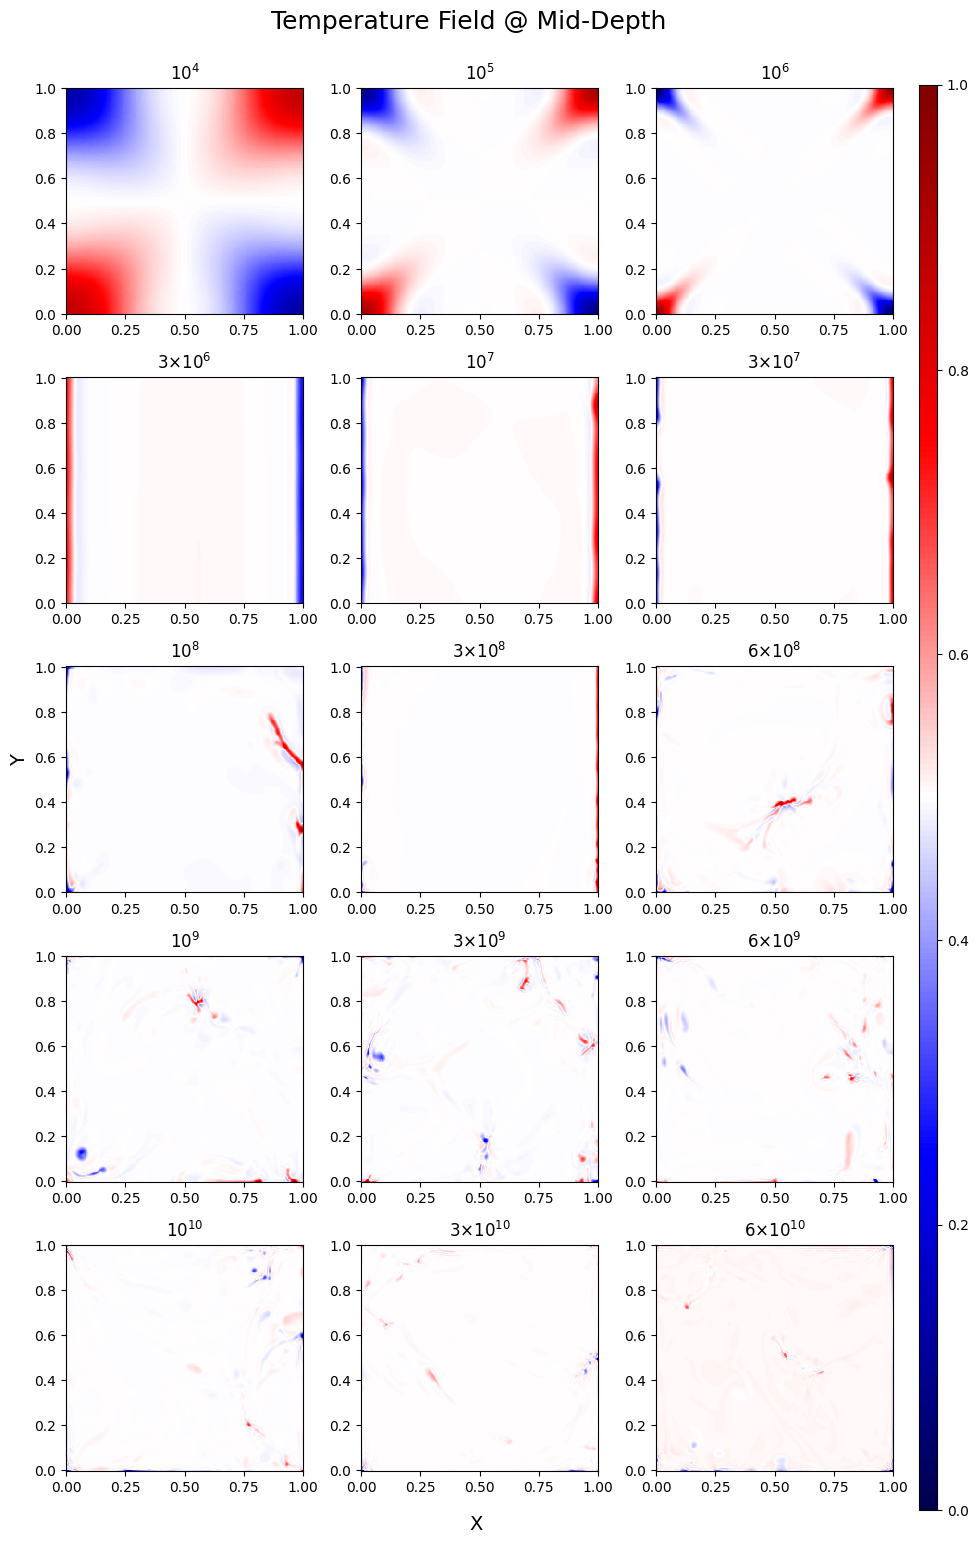

In [192]:
RaU = Data.Ra.unique()
lenRa = len(RaU)

data = [[] for i in range(lenRa)] #empty nested list

for i in range(lenRa):
    data[i] = Data.loc[Data['Ra'] == RaU[i]]

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = mticker.FuncFormatter(g)

fig = plt.figure(figsize=(9,15))
plt.suptitle("Temperature Field @ Mid-Depth", fontsize=18, y = 1.0)
dim=int(np.sqrt(len(data[0]['T'])))

for i in range(lenRa):
    dim=int(np.sqrt(len(data[i]['T'])))
    ax = plt.subplot(5, 3, i + 1)
    x = np.reshape(data[i]['Points1'].to_numpy(),(dim,dim))
    y = np.reshape(data[i]['Points2'].to_numpy(),(dim,dim))
    T = np.reshape(data[i]['T'].to_numpy(),(dim,dim))
    plt.pcolormesh(x, y, T, cmap='seismic', shading='auto',vmin=0,vmax=1)
#     plt.pcolormesh(x, y, T, cmap='coolwarm', shading='auto')
    ax.set_title('{}'.format(fmt(float(RaU[i]))))
#     plt.xlabel('{}'.format(fmt(float(RaU[i]))))
#     cax = plt.axes([0.11, -0.03, 0.8,0.05])
#     plt.colorbar(orientation='horizontal',ticks=np.linspace(0, 1, 6));

fig.text(-0.01, 0.5, 'Y', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, -0.01, 'X', va='center', fontsize=14)
fig.tight_layout()
cax = plt.axes([1, 0, 0.02, 0.95])
plt.colorbar(cax=cax)

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'Temperature Field @ Mid-Depth.png',pad_inches=0.1,bbox_inches='tight');